installing necessary libraries

In [1]:
!pip install -U -r yolov5/requirements.txt 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 7.2 MB/s eta 0:00:00m eta 0:00:010:01010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.2/645.2 kB 5.4 MB/s eta 0:00:006.0 MB/s eta 0:00:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.0
    Uninstalling matplotlib-3.8.0:
      Successfully uninstalled matplotlib-3.8.0
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.203
    Uninstalling ultralytics-8.0.203:
      Successfully uninstalled ultralytics-8.0.203


making sure cuda is installed

In [1]:
import torch
print('torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

torch 2.1.0+cu121 _CudaDeviceProperties(name='NVIDIA GeForce RTX 3060', major=8, minor=6, total_memory=12036MB, multi_processor_count=28)


downloading dataset from roboflow

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="******************")
project = rf.workspace("systech-datasoft").project("car-damage-analysis-sa9nx")
dataset = project.version(1).download("yolov5")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 209.2 kB/s eta 0:00:001m188.1 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 333.4 kB/s eta 0:00:00 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 459.0 kB/s eta 0:00:001m475.9 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 2.0 MB/s eta 0:00:00m eta 0:00:010:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 229.5 kB/s eta 0:00:00 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 1.1 MB/s eta 0:00:001.4 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 954.0 kB/s eta 0:00:00MB/s eta 0:00:01
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
      Successfully uninstalled idn


Extracting Dataset Version Zip to Car-Damage-Analysis-1 in yolov5pytorch:: 100%|


In [2]:
pwd

'/media/ahnaf/DeptOfMyst/In_ubuntu/CarDA_project'

training

In [3]:
%%time
%cd yolov5/
# dataset_location = 'path_to_dataset/data.yaml'
!python train.py --img 416 --batch 32 --epochs 100 --data '/media/ahnaf/DeptOfMyst/In_ubuntu/CarDA_project/Car-Damage-Analysis-1/data.yaml' --cfg models/yolov5s.yaml --name yolov5s_results  --cache

/media/ahnaf/DeptOfMyst/In_ubuntu/CarDA_project/yolov5
train: weights=yolov5s.pt, cfg=models/yolov5s.yaml, data=/media/ahnaf/DeptOfMyst/In_ubuntu/CarDA_project/Car-Damage-Analysis-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=32, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 14 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5 🚀 v7.0-226-gdd9e338 Python-3.11.4 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3060, 12036MiB)

hyperparameters: lr0=0.01, lr

results

In [4]:
pwd

'/media/ahnaf/DeptOfMyst/In_ubuntu/CarDA_project/yolov5'

In [12]:
# %cd yolov5

/media/ahnaf/DeptOfMyst/In_ubuntu/CarDA_project/yolov5


In [1]:
# %cd yolov5
from utils.plots import plot_results
plot_results('/media/ahnaf/DeptOfMyst/In_ubuntu/CarDA_project/yolov5/runs/train/yolov5s_results4/results.csv')

ModuleNotFoundError: No module named 'utils.plots'

In [9]:
import pandas as pd
df=pd.read_csv(r'/media/ahnaf/DeptOfMyst/In_ubuntu/CarDA_project/yolov5/runs/train/yolov5s_results4/results.csv')
# result = df['     metrics/mAP_0.5'].iloc[-1]
print(df.iloc[-1])

               epoch    99.000000
      train/box_loss     0.026254
      train/obj_loss     0.014622
      train/cls_loss     0.002760
   metrics/precision     0.772270
      metrics/recall     0.599430
     metrics/mAP_0.5     0.670240
metrics/mAP_0.5:0.95     0.328960
        val/box_loss     0.050922
        val/obj_loss     0.013047
        val/cls_loss     0.004804
               x/lr0     0.000298
               x/lr1     0.000298
               x/lr2     0.000298
Name: 99, dtype: float64


In [1]:
from PIL import Image

im_results = Image.open(r"/media/ahnaf/DeptOfMyst/In_ubuntu/CarDA_project/yolov5/runs/train/yolov5s_results4/results.png") 
im_results.show()

Inference

In [12]:
# %cd yolov5
!python detect.py --weights /media/ahnaf/DeptOfMyst/In_ubuntu/CarDA_project/yolov5/runs/train/yolov5s_results4/weights/best.pt --img 416 --conf 0.4 --source /media/ahnaf/DeptOfMyst/In_ubuntu/CarDA_project/Car-Damage-Analysis-1/train/images/image__197_jpg.rf.2dc82051d4d1224ed145c177255869d8.jpg --view-img

detect: weights=['/media/ahnaf/DeptOfMyst/In_ubuntu/CarDA_project/yolov5/runs/train/yolov5s_results4/weights/best.pt'], source=/media/ahnaf/DeptOfMyst/In_ubuntu/CarDA_project/Car-Damage-Analysis-1/train/images/image__197_jpg.rf.2dc82051d4d1224ed145c177255869d8.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=True, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-226-gdd9e338 Python-3.11.4 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3060, 12036MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /media/ahnaf/DeptOfMyst/In_ubuntu/CarDA_project/Car-Damage-Analysis-1/train/images/image__197_jpg.rf.2dc82051d4d1224ed14

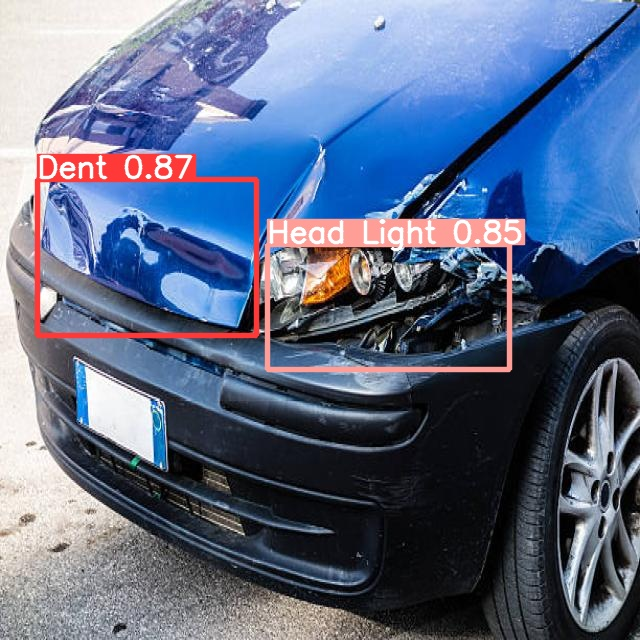